<a href="https://colab.research.google.com/github/Reddythedeveloper/internsavy_task1/blob/main/Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  ChanceofAdmit   
0         1            0.92  
1         1            0.76  
2         1            0.72  
3         1            0.80  
4         0            0.65  
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  900.000000  900.000000   900.000000         900.000000  900.000000   
mean   228.277778  316.621111   107.288889           3.102222    3.385556   
std    134.674991   11.369700     6.073968           1.143048    0.997612   
min      1.000000  290.000000    92.000000       

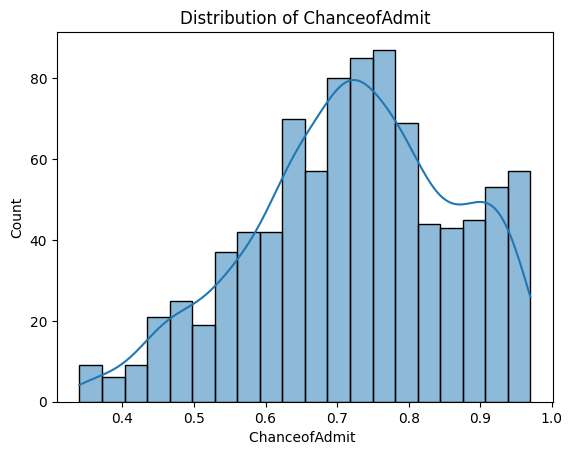

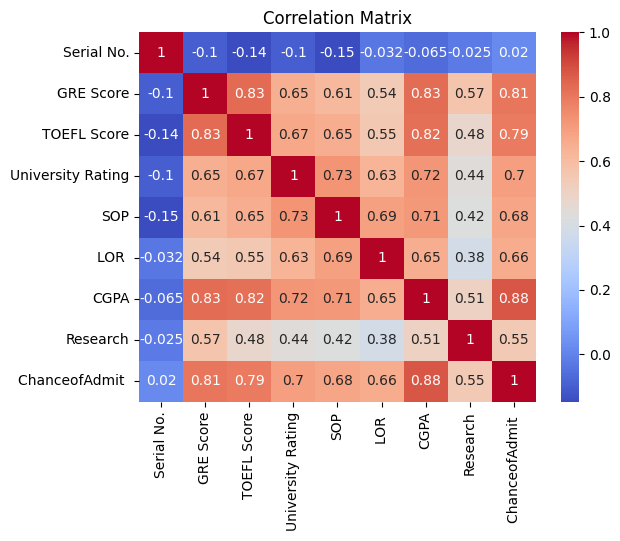

Accuracy: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        17
           1       0.92      1.00      0.96       163

    accuracy                           0.92       180
   macro avg       0.96      0.56      0.58       180
weighted avg       0.92      0.92      0.89       180

Confusion Matrix:
[[  2  15]
 [  0 163]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the datasets
data1 = pd.read_csv('Admission_Predict.csv')
data2 = pd.read_csv('Admission_Predict_Ver1.1.csv')

# Merge the datasets
data = pd.concat([data1, data2], ignore_index=True)

# Step 2: Data Exploration
# Check the first few rows of the dataset
print(data.head())

# Get summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of 'ChanceofAdmit '
sns.histplot(data['ChanceofAdmit '], bins=20, kde=True)
plt.title('Distribution of ChanceofAdmit')
plt.xlabel('ChanceofAdmit ')
plt.show()

# Visualize the correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Data Preparation
X = data.drop(columns=['ChanceofAdmit '])  # Use 'ChanceofAdmit ' as the correct column name
y = data['ChanceofAdmit ']

# Convert 'ChanceofAdmit ' to binary labels (e.g., 1 for Admitted, 0 for Not Admitted)
y = (y >= 0.5).astype(int)

# Step 4: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a Classification Model (Logistic Regression)
model = LogisticRegression()

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report}")
print(f"Confusion Matrix:\n{conf_matrix}")
